## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df= pd.read_csv('/content/kyphosis.csv')
#- Age: in months
#- Number: the number of vertebrae involved
#- Start: the number of the first (topmost) vertebra operated on.

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


<Axes: xlabel='None'>

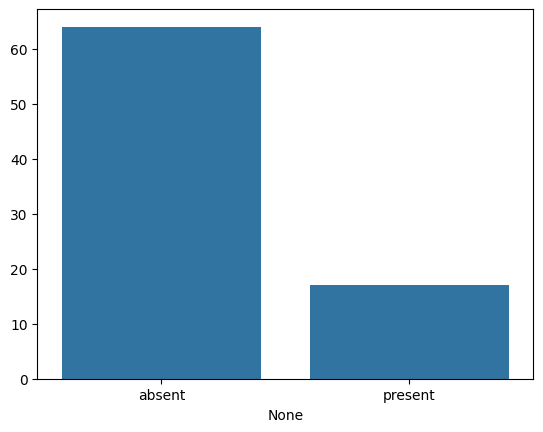

In [ ]:
vc= df['Kyphosis'].value_counts()
sns.barplot(x= vc.index, y= vc.values)

In [ ]:
 df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

From the above value count it is evident that this is an imbalanced dataset as the no. of minority class * 2 is still less than the majority class. We will eventually use SMOTE to handle this.

In [ ]:
x = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

x_np= x.to_numpy()#converting df into numpy array for memory optimization
y_np = y.to_numpy()#converting df into numpy array for memory optimization

#converting categorical variables into numerical form to prepare for machine learning algorithms.
y = y.apply(lambda x: 1 if x == 'present' else 0)
y_np= np.where(y_np == 'present',1,0)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=41 ,stratify = y)
x_train_np, x_test_np, y_train_np, y_test_np = train_test_split(x_np,y_np,test_size=0.3,random_state=41 ,stratify = y)

print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)
print(x_train_np.shape, x_test_np.shape, y_train_np.shape , y_test_np.shape)
print(type(x_train), type(x_train_np))

(56, 3) (25, 3) (56,) (25,)
(56, 3) (25, 3) (56,) (25,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [ ]:
from imblearn.combine import SMOTETomek
# Implementing Oversampling for Handling Imbalanced
smk = SMOTETomek(random_state=42)
X_train_res,y_train_res=smk.fit_resample(x_train_np,y_train_np)

In [ ]:
X_train_res.shape,y_train_res.shape

((86, 3), (86,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train_np)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 44, 1: 12})
Resampled dataset shape Counter({0: 43, 1: 43})


In [ ]:
#feature scaling
scaler=MinMaxScaler()
X_train_sc=scaler.fit_transform(X_train_res)
X_test_sc=scaler.transform(x_test_np)

In [ ]:
## ML task- Binary classification:
## Types of classification tasks - Multi-class classification,
##                                 Binary classification (1 vs all),
##                                 Multi-label classification
## Some ML algos that can be used for Binary classification  -->  Logistic reg, Naive Bayes, SVM, Decision Trees, RFs, NNs, etc

In [ ]:
#LogisticRegression
lr= LogisticRegression()
lr.fit(X_train_sc,y_train_res)
# making predictions on the testing set
y_pred = lr.predict(X_test_sc)
# comparing actual response values (y_test_np)
# with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
      accuracy_score(y_test_np, y_pred)*100)

Logistic Regression model accuracy(in %): 76.0


In [ ]:
from sklearn.naive_bayes import GaussianNB
# Train a Naive Bayes classifier (GaussianNB)
gnb = GaussianNB()
gnb.fit(X_train_res,y_train_res)
print("Naive Bayes classifier model accuracy(in %):",
      accuracy_score(gnb.predict(x_test_np), y_test_np)*100)# Typically, feature scaling is not required for Naive Bayes algorithms.Hence feeding test numpy data for prediction.

Naive Bayes classifier model accuracy(in %): 80.0


In [ ]:
from sklearn.svm import SVC
# Training a support vector classifier
svm = SVC(kernel="rbf", gamma=0.2, C=1.0)
svm.fit(X_train_sc,y_train_res)
print("Support Vector Classifer model accuracy(in %):",
      accuracy_score(svm.predict(X_test_sc), y_test_np)*100)

Support Vector Classifer model accuracy(in %): 72.0


Decision Tree Classifer model accuracy(in %): 76.0


[Text(0.6, 0.9, 'x[2] <= 8.5\ngini = 0.5\nsamples = 86\nvalue = [43, 43]'),
 Text(0.4, 0.7, 'x[2] <= 3.5\ngini = 0.193\nsamples = 37\nvalue = [4, 33]'),
 Text(0.3, 0.5, 'x[0] <= 77.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.2, 0.3, 'x[0] <= 12.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.1, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 27\nvalue = [0, 27]'),
 Text(0.8, 0.7, 'x[2] <= 14.5\ngini = 0.325\nsamples = 49\nvalue = [39, 10]'),
 Text(0.7, 0.5, 'x[0] <= 47.0\ngini = 0.459\nsamples = 28\nvalue = [18, 10]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.8, 0.3, 'x[0] <= 99.0\ngini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(0.7, 0.1, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.9, 0.1, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamp

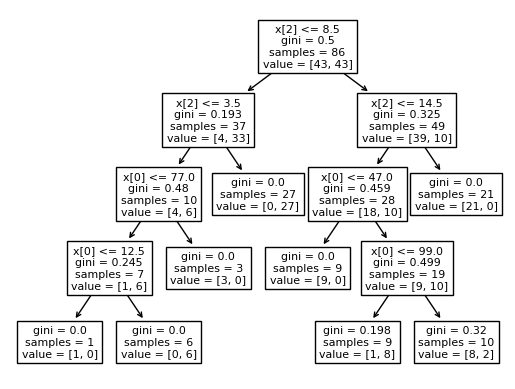

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc= DecisionTreeClassifier(max_depth = 4, criterion='gini')
dtc.fit(X_train_res,y_train_res)
#print(accuracy_score(dtc.predict(x_test_np), y_test_np))
print("Decision Tree Classifer model accuracy(in %):",
      accuracy_score(dtc.predict(x_test_np), y_test_np)*100)
tree.plot_tree(dtc)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(max_depth = 4, n_estimators= 10)
rfc.fit(X_train_res,y_train_res)# As feature scaling is not required for random forest classifier
print("RandomForestClassifier model accuracy(in %):",
      accuracy_score(rfc.predict(x_test_np), y_test_np)*100)


RandomForestClassifier model accuracy(in %): 76.0


In [ ]:
### Hyperparametric tuning using gridsearchcv()
forest_params = [{'max_depth': list(range(2, 12)), 'n_estimators': [10,50,100,150,200]}]
model_cv = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

model_cv.fit(X_train_res,y_train_res)
print("RandomForestClassifier model accuracy after hyperparametric tuning-GridSearchCV(in %):",
      accuracy_score(model_cv.predict(x_test_np), y_test_np)*100)

RandomForestClassifier model accuracy after hyperparametric tuning-GridSearchCV(in %): 84.0


In [ ]:
### Hyperparametric tuning using RandomSeachCV()
forest_params = [{'max_depth': list(range(2, 12)), 'n_estimators': [10,50,100,150,200]}]
model_RScv = RandomizedSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

model_RScv.fit(X_train_res,y_train_res)
print("RandomForestClassifier model accuracy after hyperparametric tuning-RandomizedSearchCV(in %):",
      accuracy_score(model_RScv.predict(x_test_np), y_test_np)*100)

RandomForestClassifier model accuracy after hyperparametric tuning-RandomizedSearchCV(in %): 88.0


[[17  3]
 [ 0  5]]


[Text(0, 0.5, 'Kyphosis Absent'), Text(0, 1.5, 'Kyphosis Present')]

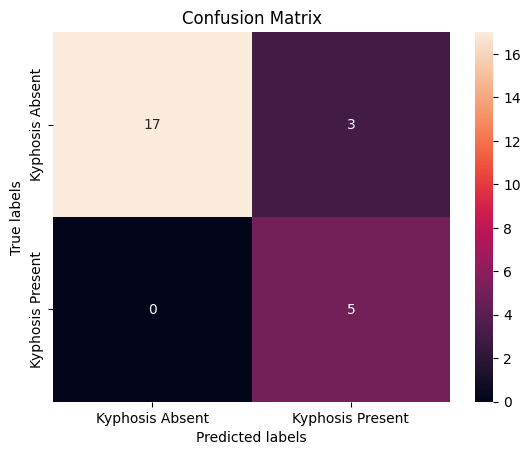

In [ ]:
labels = ['Kyphosis Absent', 'Kyphosis Present']
cm = confusion_matrix(y_test_np, model_RScv.predict(x_test_np))
print(cm)


ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(classification_report(y_test_np, model_RScv.predict(x_test_np)))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.62      1.00      0.77         5

    accuracy                           0.88        25
   macro avg       0.81      0.93      0.84        25
weighted avg       0.93      0.88      0.89        25



In [ ]:
# Apply post processing by changing threshold from 0.5 to 0.65
# >0.65 ===> True else False
threshold = 0.65
y_pred_adjusted = np.where(model_RScv.predict(x_test_np) >= threshold, 1, 0)

# Step 4: Evaluate the adjusted predictions
accuracy = accuracy_score(y_test_np, y_pred_adjusted)
precision = precision_score(y_test_np, y_pred_adjusted)
recall = recall_score(y_test_np, y_pred_adjusted)
f1 = f1_score(y_test_np, y_pred_adjusted)

In [ ]:
accuracy

0.88

In [ ]:
precision

0.625

In [ ]:
recall

1.0

In [ ]:
f1

0.7692307692307693

In [ ]:

import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score


# X_train, X_test, y_train, y_test are already defined
# Providing scaled data to Logistic Regression model
lr= LogisticRegression()
lr.fit(X_train_sc,y_train_res)
lr_scores = lr.predict_proba(X_test_sc)[:,1]

# Providing scaled data to SVM model
svm = SVC(kernel="rbf", gamma=0.2, C=1.0,probability=True)
svm.fit(X_train_sc,y_train_res)
svm_scores = svm.predict_proba(X_test_sc)[:,1]

# Providing resampled data to SVM model
forest_params = [{'max_depth': list(range(2, 12)), 'n_estimators': [10,50,100,150,200]}]
model_RScv = RandomizedSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
model_RScv.fit(X_train_res,y_train_res)
RScv_scores = model_RScv.predict_proba(x_test_np)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test_np, lr_scores)
lr_auc = roc_auc_score(y_test_np, lr_scores)

# Generate ROC curve data for SVM model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test_np, svm_scores)
svm_auc = roc_auc_score(y_test_np, svm_scores)

# Generate ROC curve data for RScv(Randomized search cv) model
RScv_fpr, RScv_tpr, RScv_thresholds = roc_curve(y_test_np, RScv_scores)
RScv_auc = roc_auc_score(y_test_np, RScv_scores)


# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Generate a trace for the RScv ROC curve
trace2 = go.Scatter(
    x=RScv_fpr,
    y=RScv_tpr,
    mode='lines',
    name=f'RScv (Area = {RScv_auc:.2f})'
)

# Diagonal line
trace3 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2, trace3]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

In [ ]:
#Optimal threshold for Logistic Regression model
optimal_idx_lr = np.argmax(lr_tpr -  lr_fpr)
optimal_threshold_lr =  lr_thresholds[optimal_idx_lr]
print("Optimal threshold for Logistic Regression model is:", optimal_threshold_lr)

#Optimal threshold for SVM model
optimal_idx_svm = np.argmax(svm_tpr -  svm_fpr)
optimal_threshold_svm =  svm_thresholds[optimal_idx_svm]
print("Optimal threshold for SVM model is:", optimal_threshold_svm)

#Optimal threshold for Random forest/Randomized search CV
optimal_idx_RScv = np.argmax(RScv_tpr -  RScv_fpr)
optimal_threshold_RScv =  RScv_thresholds[optimal_idx_RScv]
print("Optimal threshold for  Random forest/Randomized search CV model is:", optimal_threshold_RScv)

Optimal threshold for Logistic Regression model is: 0.7033927252340235
Optimal threshold for SVM model is: 0.8247616658551068
Optimal threshold for  Random forest/Randomized search CV model is: 0.46
